# Spatial relationships
Spatial objiects such as point, line and polygon, may have one or more topological relationships such as containment, overlap, neighbor, and also metric relationships that is the distance between them. The Python package Shapely, included in the GeoPandas package, provides such functions for planar geometry. Shapely is a Python port of [GEOS](https://libgeos.org/), the C++ port of the [Java Topology Suite (JTS)](https://github.com/locationtech/jts/), a Java implementation of topological operators. We begin with a simple example with two datasets, a set of points that may represent point of interest (POI) and a set of polygons that represent the neighborhoods in NYC. We will find out the POIs that lie within one of the neighborhood.

In [ ]:
%matplotlib inline
from shapely.geometry import Point
from geopandas import datasets, GeoDataFrame, read_file
import matplotlib.pyplot as plt

In [15]:
# NYC Boros
zippath = datasets.get_path('nybb')
neighborhoods_df = read_file(zippath)

# Generate some points
b = [int(x) for x in polydf.total_bounds]
N = 8
pois_df = GeoDataFrame([
    {'geometry': Point(x, y), 'value1': x + y, 'value2': x - y}
    for x, y in zip(range(b[0], b[2], int((b[2] - b[0]) / N)),
                    range(b[1], b[3], int((b[3] - b[1]) / N)))])

We have to assign a Coordinate Reference System (CRS) to the POIs

In [16]:
pois_df.crs

The CRS used by the polygons is EPSG:2263

In [18]:
neighborhoods_df.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

We assign the same CRS to the points 


In [19]:
pois_df.crs = neighborhoods_df.crs

<AxesSubplot:>

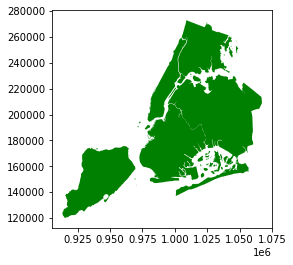

In [42]:
neighborhoods_df.plot(color='green')

<AxesSubplot:>

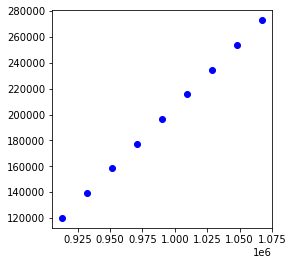

In [43]:
pois_df.plot(color='blue')

In [24]:
neighborhoods_df

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


<AxesSubplot:>

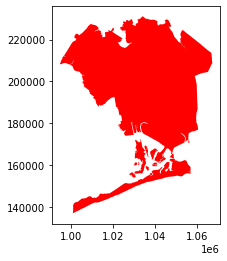

In [25]:
queens = neighborhoods_df[neighborhoods_df['BoroName'] == 'Queens']
queens.plot(color='red')

## Point-in-polygon
We look for points that lie within Queens neighborhood

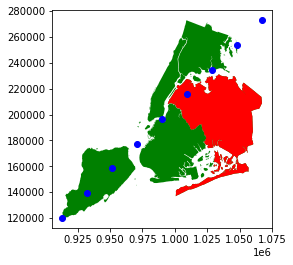

In [44]:
fig, ax = plt.subplots()
neighborhoods_df.plot(ax=ax, facecolor='green')
queens.plot(ax=ax, color='red')
pois_df.plot(ax=ax, color='blue');

The Queens neighborhood is at index=1 so we use the within() function to determine the points that lie within the geometry at index 1 in the geo dataframe  

In [30]:
poi_in_queens_mask = pois_df.within(polydf.loc[1, 'geometry'])
poi_in_queens_mask

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
dtype: bool

We have found out that only the POI with index=5 lies within the Queens neighborhood

In [33]:
poi_in_queens = pois_df.loc[poi_in_queens_mask]
poi_in_queens

,geometry,value1,value2
5,POINT (1009550.000 215571.000),1225121,793979


Now we can plot the POI that lies within the Queens neighborhood

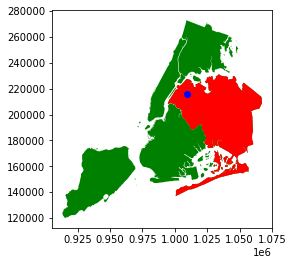

In [45]:
fig, ax = plt.subplots()
neighborhoods_df.plot(ax=ax, facecolor='green')
queens.plot(ax=ax, color='red')
poi_in_queens.plot(ax=ax, color='blue');

## Spatial joins
One more thing we can do is to add to the neighborhoods data the information about the POIs that lie withing them. We can achieve the result by performing a spatial join between the two datasets

In [35]:
join_inner_df = pois_df.sjoin(neighborhoods_df, how="inner")
join_inner_df

,geometry,value1,value2,index_right,BoroCode,BoroName,Shape_Leng,Shape_Area
1,POINT (932450.000 139211.000),1071661,793239,0,5,Staten Island,330470.010332,1.623820e+09
2,POINT (951725.000 158301.000),1110026,793424,0,5,Staten Island,330470.010332,1.623820e+09
5,POINT (1009550.000 215571.000),1225121,793979,1,4,Queens,896344.047763,3.045213e+09
6,POINT (1028825.000 234661.000),1263486,794164,4,2,Bronx,464392.991824,1.186925e+09


Finally we can plot the POIs that lie within one of the neighborhoods in NYC.

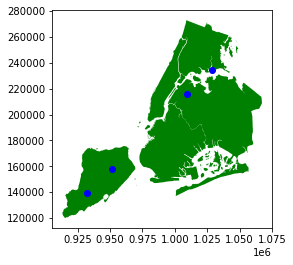

In [46]:
fig, ax = plt.subplots()
neighborhoods_df.plot(ax=ax, facecolor='green')
join_inner_df.plot(ax=ax, color='blue');

## Other spatial relationships

In [60]:
from shapely.geometry import Point, Polygon

# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

In [61]:
# Let's check what we have
print(p1)

POINT (24.952242 60.1696017)


In [62]:
print(p2)

POINT (24.976567 60.16125)


In [63]:
print(poly)

POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


In [64]:
p1.within(poly)

True

In [14]:
p2.within(poly)

False

## Intersect

In [47]:
from shapely.geometry import LineString, MultiLineString
# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

In [48]:
line_a.intersects(line_b)

True

In [49]:
line_a.touches(line_b)

True

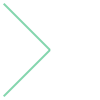

In [50]:
multi_line = MultiLineString([line_a, line_b])
multi_line

### References
* [Intro to Python GIS](https://automating-gis-processes.github.io/CSC18/lessons/L4/point-in-polygon.html)
* [Shapely: A Python package for manipulation and analysis of planar geometric objects](https://shapely.readthedocs.io/en/stable/index.html)
* [ISPRA - IdroGEO - Mosaicatura Nazionale e Regionale Pericolosita' Frane e Alluvioni](https://idrogeo.isprambiente.it/app/page/open-data) 